# <a name="0.0"></a>Содержание:
* [Описание проекта](#0.)
    - [Описание данных](#0.1.) 
* [Шаг 1. Открываем файл и изучаем общую информацию](#1.)
    - [Импорт библиотек](#1.1.)
    - [Изучаем общую информацию](#1.2.)
    - [Вывод](#1.3.)
* [Шаг 2. Предобработка данных](#2.)
    - [Вывод](#2.1.)
* [Шаг 3. Проводим дополнительные вычисления](#3.)
* [Шаг 4. Проводим исследовательский анализ данных](#4.)   
    - [Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограмы для каждого параметра](#4.1.)
    - [Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?](#4.2.)
    - [Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.](#4.3.)
    - [Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.](#4.4.)
    - [Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.](#4.5.)
    - [Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге. необходимо выяснить, какая область входит в центр. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.](#4.6.)
    - [Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).](#4.7.)
* [Шаг 5. Общий вывод](#5.)

<a name="0."></a>
## Описание проекта
Имеется архив объявлений о продаже квартир в городе Z и соседних населённых пунктах за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости на основании имеющихся данных для дальнейшего построения автоматизированной системы, которая будет отслеживать аномалии и мошенническую деятельность<br>
По каждой квартире имеется два вида данных:
- записанные пользователями
- полученные автоматически<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="0.1"></a>
### Описание данных
- total_images - число фотаграфий квартиры в объявлении
- last_price - цена квартиры на момент снятия объявления
- total_area - общая площадь квартиры ($м^2$)
- first_day_exposition - дата первой публикации объявления
- rooms - число комнат
- ceiling_height - высота потолков (м)
- floors_total - количество этажей в доме
- living_area - жилая площадь ($м^2$)
- floor - этаж
- locality_name - название населённого пункта 
- airports_nearest - расстояние до ближайшего аэропорта (м)
- cityCenters_nearest - расстояние до центра город (м)
- parks_around3000 - количество парков в радиусе 3 км
- parks_nearest - расстояние до ближайшего парка (м)
- ponds_around3000 - количество прудов в радиусе 3 км
- ponds_nearest - расстояние до ближайшего пруда
- days_exposition - сколько дней было размещено объявление<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="1."></a>
# Шаг 1. Открываем файл и изучаем общую информацию

<font size="2">([к содержанию](#0.0))</font>

<a name="1.1."></a>
## Импорт библиотек

<font size="2">([к содержанию](#0.0))</font>

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

<a name="1.2."></a>
## Изучаем общую информацию

<font size="2">([к содержанию](#0.0))</font>

In [2]:
data=pd.read_csv('./datasets/real_estate_data.csv', sep='\t')

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [4]:
#Первичный взгляд на имеющиеся данные
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
#Выводим статистику по исходным данным
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
#Преобразуем столбец studio к int для оценки корреляции
data['studio_int']=data['studio'].astype('int')

In [7]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

<a name="1.3."></a>
## Вывод
Исходный данные  представляют собой таблицу, содержащую 23699 записей и 22 признака. В качестве разделителя в csv файле используется знак табуляции (\t), вместо типичной точки с запятой. Первичный анализ показывает, что таблица содержит множество пустых значенений, которые в последующих частях проекта будут рассмотрены более подробно и обработаны<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="2."></a>
# Шаг 2. Предобработка данных

<font size="2">([к содержанию](#0.0))</font>

In [8]:
#Изучим пропущенные значения
#Число фотографий квартиры в объявлении
data['total_images'].value_counts()

#Цена на момент снятия с публикации
data['last_price'].value_counts()

#Площадь квартиры в квадратных метрах (м²)
data['total_area'].value_counts()

#дата публикации
data['first_day_exposition'].value_counts()

#число комнат
data['rooms'].value_counts()

#высота потолков (м)
data['ceiling_height'].value_counts()

#всего этажей в доме
data['floors_total'].value_counts()

#жилая площадь в квадратных метрах(м²)
data['living_area'].value_counts()

#Этаж
data['floor'].value_counts()

#апартаменты?
data['is_apartment'].value_counts()

#Квартира-студия?
data['studio'].value_counts()

#Свободная планировка?
data['open_plan'].value_counts()

#Площадь кухни в квадратных метрах
data['kitchen_area'].value_counts()

#Число балконов
data['balcony'].value_counts()

#Название населённого пункта
data['locality_name'].value_counts()

#Расстояние до ближайшего аэропорта в метрах (м)
data['airports_nearest'].value_counts()

#расстояние до центра города (м)
data['cityCenters_nearest'].value_counts()

#Число парков в радиусе 3 км
data['parks_around3000'].value_counts()

#Расстояние до ближайшего парка
data['parks_nearest'].value_counts()

#Число водоёмов в радиусе 3 км
data['ponds_around3000'].value_counts()

#Расстояние до ближайшего водоёма (м)
data['ponds_nearest'].value_counts()

#Сколько дней было размещено объявление (от публикации до снятия)
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [9]:
#Формируем первоначальный вывод
for column in data.columns:
    #Количество пустых записей
    emptyRecords=len(data.loc[data[column].isnull()])
    if emptyRecords>0:
        print('- {} - содержит {} пропусков ({:.1%} от всех)'.format(column, emptyRecords, emptyRecords/data.shape[0]))

- ceiling_height - содержит 9195 пропусков (38.8% от всех)
- floors_total - содержит 86 пропусков (0.4% от всех)
- living_area - содержит 1903 пропусков (8.0% от всех)
- is_apartment - содержит 20924 пропусков (88.3% от всех)
- kitchen_area - содержит 2278 пропусков (9.6% от всех)
- balcony - содержит 11519 пропусков (48.6% от всех)
- locality_name - содержит 49 пропусков (0.2% от всех)
- airports_nearest - содержит 5542 пропусков (23.4% от всех)
- cityCenters_nearest - содержит 5519 пропусков (23.3% от всех)
- parks_around3000 - содержит 5518 пропусков (23.3% от всех)
- parks_nearest - содержит 15620 пропусков (65.9% от всех)
- ponds_around3000 - содержит 5518 пропусков (23.3% от всех)
- ponds_nearest - содержит 14589 пропусков (61.6% от всех)
- days_exposition - содержит 3181 пропусков (13.4% от всех)


In [11]:
#Дропаем пустые строки с locality_name
data.dropna(subset=['locality_name'],inplace=True)

In [12]:
#Сгруппируем места с малым количеством объялений в единые группы
def set_locality_name(row):
    name=row['locality_name']
    if 'городской поселок' in name:
        return 'городской поселок'
    if 'городской посёлок' in name:
        return 'городской поселок'
    if 'деревня' in name:
        return 'деревня'
    if 'коттеджный поселок' in name:
        return 'коттеджный поселок'
    if 'поселок' in name:
        return 'поселок'
    if 'посёлок' in name:
        return 'поселок'
    if 'поселок городского типа' in name:
        return 'поселок городского типа'
    if 'поселок станции' in name:
        return 'поселок станции'
    if 'посёлок при железнодорожной станции' in name:
        return 'поселок станции'
    if 'садоводческое некоммерческое товарищество' in name:
        return 'садоводческое товарищество'
    if 'садовое товарищество' in name:
        return 'садоводческое товарищество'
    if 'село' in name:
        return 'село'
    return name

data['locality_name_type']=data.apply(set_locality_name, axis=1)

In [13]:
#Для единообразия количество комнат для студий примем равным 0
data['rooms']=data['rooms'].where(~data['studio'], 0)

In [14]:
#Преобразуем формат даты
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

Корреляция между высотой потолков и расстоянием от центра составляет: -0.36700633398562094
Медианная высота потолков для квартир из центра: 3.1
Медианная высота потолков для квартир вне центра: 2.64


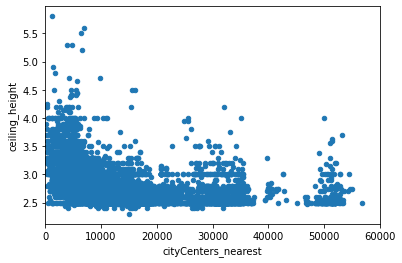

In [15]:
#Посмотрим, как зависит расстояние от центра на высоту потолков

#У некоторых объектов высота потолков >6 метров - это что, зимний дворец? Коробки высотой меньше 2 метров также надо отбросить
data_for_ceiling_parse=data.loc[(data['ceiling_height']<6) & (data['ceiling_height']>2)]

#Выберем непустые значения
ceiling_height_parse=data_for_ceiling_parse.loc[~data_for_ceiling_parse["ceiling_height"].isnull()]
ceiling_height_parse.plot(x='cityCenters_nearest', y='ceiling_height', kind='scatter',xlim=(0,60000))
#Условимся, что всё что ближе 5 км от центра - это центральный район, там стоят старые здания с высокими потолками
print("Корреляция между высотой потолков и расстоянием от центра составляет:",ceiling_height_parse['cityCenters_nearest'].corr(ceiling_height_parse['ceiling_height']))
median_central_ceiling_height=ceiling_height_parse[ceiling_height_parse['cityCenters_nearest']<5000]['ceiling_height'].median()
print('Медианная высота потолков для квартир из центра:',median_central_ceiling_height)
median_noncentral_ceiling_height=ceiling_height_parse[ceiling_height_parse['cityCenters_nearest']>5000]['ceiling_height'].median()
print('Медианная высота потолков для квартир вне центра:',median_noncentral_ceiling_height)

Как видно из диаграммы рассеяния, между расстоянием от центра и высотой потолок наблюдается связь, но не такая сильная как ожидалось, всего лишь -0.37. По графику видно, что квартиры в радиусе 5 км от центра имеют медианную высоту потолков, равную: 3,1. Данное значение вписывается в высоту для сталинки, следовательно, для заполненения пропусков будем использовать 2 типа значений по высоте потолков: 3,1 - для квартир в районе 5 км от центра и 2.64 для остальных

In [16]:
def set_ceiling_height(row):
    if pd.isnull(row['ceiling_height']):
        if row['cityCenters_nearest']<5000:
            return median_central_ceiling_height
        else:
            return median_noncentral_ceiling_height
    return row['ceiling_height']

In [17]:
#заполнили пропуски в высоте потолков
data['ceiling_height']=data.apply(set_ceiling_height, axis=1)
#Дропнули аномальные значения
data=data.loc[(data['ceiling_height']<6) & (data['ceiling_height']>2)]

In [18]:
#Найдём самый дальний от центра дом с пометкой Санкт-Петербург - это 30 км от центра (забыл зачем)
city_border=data.loc[data['locality_name_type']=='Санкт-Петербург']['cityCenters_nearest'].max()
print("Радиус Санкт-Петербурга:",city_border)

Радиус Санкт-Петербурга: 29493.0


In [19]:
#Дропаем строки с пустым количеством этажей, так как их немного
data.dropna(subset=['floors_total'],inplace=True)

In [20]:
#Заполняем пустые значения в столбце жилая площадь в квадратных метрах(м²) 
#Сперва группируем наши данные по количеству комнат
living_area_parse=data.loc[~data['living_area'].isnull()]
rooms_grouped=living_area_parse.pivot_table(index='rooms', 
                                            values='living_area', aggfunc='median')

In [25]:
rooms_grouped

,living_area
rooms,
0,18.000
1,17.600
2,30.500
3,45.000
4,63.550
5,91.785
6,124.400
7,145.000
8,161.000


In [27]:
#Заполним медианными значениями пропуски
for rooms in rooms_grouped.index:
    median = rooms_grouped.loc[rooms]['living_area']
    data.loc[data['rooms'] == rooms, 'living_area'] = data[data['rooms'] == rooms]['living_area'].fillna(median)

Wall time: 38.9 ms


In [28]:
def set_living_area(row):
    if pd.isnull(row['living_area']):
        for index in rooms_grouped.index:
            if row['rooms']==index:
                return rooms_grouped.loc[index,'living_area']
        return 'Ошибка'
    return row['living_area']

In [31]:
#Заполним размер жилых комнат в соответствии с количеством комнат
data['living_area']=data.apply(set_living_area,axis=1)

In [32]:
#Дропаем пустые строки в столбце cityCenters_nearest для Санкт-Петербурга
data=data.loc[~((data["cityCenters_nearest"].isnull()) & (data["locality_name_type"]=='Санкт-Петербург'))]
data["cityCenters_nearest"].fillna(0)

#Сперва группируем наши данные по locality_name
cityCenters_nearest_parse=data.loc[~data['cityCenters_nearest'].isnull()]
locality_grouped=cityCenters_nearest_parse.pivot_table(index='locality_name_type', 
                                                       values='cityCenters_nearest', aggfunc='median')

In [34]:
def set_cityCenters_nearest(row):
    if pd.isnull(row['cityCenters_nearest']):
        for index in locality_grouped.index:
            if row['locality_name']==index:
                return locality_grouped.loc[index,'cityCenters_nearest']
        return 'Ошибка'
    return row['cityCenters_nearest']

In [35]:
locality_grouped

,cityCenters_nearest
locality_name_type,
Зеленогорск,53381.0
Колпино,32018.0
Красное Село,29155.0
Кронштадт,49572.5
Ломоносов,51677.0
Павловск,32683.0
Петергоф,33771.0
Пушкин,27930.5
Санкт-Петербург,12243.0


In [36]:
#Заполняем пропуски в столбце медианными значениями, сгруппированными по городам
data['cityCenters_nearest']=data.apply(set_cityCenters_nearest, axis=1)

In [37]:
#Заполняем пропуски в столбце is_apartment
data['is_apartment'].fillna(False, inplace=True)

In [38]:
#Заполняем пропуски в столбце balcony
data['balcony'].fillna(0, inplace=True)

In [39]:
data.corr().sort_values(by='kitchen_area')['kitchen_area']

ponds_nearest      -0.104907
airports_nearest    0.007852
parks_nearest       0.029551
balcony             0.045592
is_apartment        0.053021
parks_around3000    0.088684
days_exposition     0.100505
total_images        0.105547
floor               0.137219
ponds_around3000    0.151290
floors_total        0.166278
rooms               0.270671
ceiling_height      0.362394
living_area         0.425549
last_price          0.521009
total_area          0.610398
kitchen_area        1.000000
studio                   NaN
open_plan                NaN
studio_int               NaN
Name: kitchen_area, dtype: float64

In [40]:
#Заполняем пропуски в столбце kitchen_area
#Сперва группируем наши данные по количеству комнат
#Может не надо было порождать лишнюю сущность, а записхнуть в values несколько столбцов
kitchen_area_parse=data.loc[~data['kitchen_area'].isnull()]
area_grouped_for_kitchen=kitchen_area_parse.pivot_table(index='total_area', values='kitchen_area', aggfunc='median')

In [41]:
for area in area_grouped_for_kitchen.index:
    median = area_grouped_for_kitchen.loc[area]['kitchen_area']
    data.loc[data['total_area'] == area, 'kitchen_area'] = data[data['total_area'] == area]['kitchen_area'].fillna(median)

In [42]:
data.dropna(subset=['kitchen_area'],inplace=True)

In [43]:
#Добавляем отметки о том закрыто объявление или нет
data['Open']=data['days_exposition'].isnull()

In [44]:
def set_days_exposition(row):
    if pd.isnull(row['days_exposition']):
        return (now-row['first_day_exposition']).days
    return row['days_exposition']

In [46]:
now=datetime.datetime.today()
#Заполняем пропуски в столбце days_exposition
data['days_exposition']=data.apply(set_days_exposition, axis=1)

In [47]:
#Заполняем пропуски в столбце parks_around3000
data['parks_around3000'].fillna(0, inplace=True)
#Заполняем пропуски в столбце ponds_around3000
data['ponds_around3000'].fillna(0, inplace=True)

In [48]:
#Заполняем пропуски в столбце parks_nearest
parks_nearest_parse=data.loc[~data['parks_nearest'].isnull()]
parks_nearest_grouped=parks_nearest_parse.pivot_table(index='locality_name_type', 
                                                      values='parks_nearest', aggfunc='median')

In [49]:
def set_parks_nearest(row):
    if pd.isnull(row['parks_nearest']):
        if row['parks_around3000']==0:
            return 0
        for index in parks_nearest_grouped.index:
            if row['locality_name_type']==index:
                return parks_nearest_grouped.loc[index,'parks_nearest']
        return 'Ошибка'
    return row['parks_nearest']

In [50]:
#Заполняем пропуски в столбце parks_nearest
data['parks_nearest']=data.apply(set_parks_nearest,axis=1)

In [53]:
#Заполняем пропуски в столбце ponds_nearest
ponds_nearest_parse=data.loc[~data['ponds_nearest'].isnull()]
ponds_nearest_grouped=ponds_nearest_parse.pivot_table(index='locality_name_type', 
                                                      values='ponds_nearest', aggfunc='median')

In [54]:
def set_ponds_nearest(row):
    if pd.isnull(row['ponds_nearest']):
        if row['ponds_around3000']==0:
            return 0
        for index in ponds_nearest_grouped.index:
            if row['locality_name']==index:
                return ponds_nearest_grouped.loc[index,'ponds_nearest']
        return 'Ошибка'
    return row['ponds_nearest']

In [55]:
#Заполняем пропуски в столбце ponds_nearest
data['ponds_nearest']=data.apply(set_ponds_nearest,axis=1)

In [56]:
#Заполняем пропуски в столбце airports_nearest
data=data.loc[~((data["airports_nearest"].isnull())& (data["locality_name_type"]=='Санкт-Петербург'))]
airports_nearest_grouped=data.pivot_table(index='locality_name_type', 
                                          values='airports_nearest', aggfunc='median')

In [57]:
def set_airports_nearest(row):
    if pd.isnull(row['airports_nearest']):
        for index in airports_nearest_grouped.index:
            if row['locality_name']==index:
                return airports_nearest_grouped.loc[index,'airports_nearest']
        return 'Ошибка'
    return row['airports_nearest']

In [58]:
data['airports_nearest']=data.apply(set_airports_nearest,axis=1)

In [59]:
#Удаляем ошибочные данные
data[data['cityCenters_nearest']=='Ошибка']
data[data['airports_nearest']=='Ошибка']
data[data['kitchen_area']=='Ошибка']['rooms'].value_counts()

Series([], Name: rooms, dtype: int64)

In [60]:
#Заменяем строки, в которых обнаружена ошибка на нули
data['cityCenters_nearest']=data['cityCenters_nearest'].where(
    data['cityCenters_nearest']!='Ошибка',0)
data['airports_nearest']=data['airports_nearest'].where(
    data['airports_nearest']!='Ошибка',0)

In [61]:
#Приводим к нужным форматам
data["floors_total"]=data["floors_total"].astype('int')
data["parks_around3000"]=data["parks_around3000"].astype('int')
data["days_exposition"]=data["days_exposition"].astype('int')
data['airports_nearest']=data["days_exposition"].astype('int')
data['balcony']=data['balcony'].astype('int')
data['cityCenters_nearest']=data["cityCenters_nearest"].astype('int')
data["ponds_around3000"]=data["ponds_around3000"].astype('int')

In [64]:
#Ещё раз смотрим на данные
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23252 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23252 non-null  int64         
 1   last_price            23252 non-null  float64       
 2   total_area            23252 non-null  float64       
 3   first_day_exposition  23252 non-null  datetime64[ns]
 4   rooms                 23252 non-null  int64         
 5   ceiling_height        23252 non-null  float64       
 6   floors_total          23252 non-null  int32         
 7   living_area           23252 non-null  float64       
 8   floor                 23252 non-null  int64         
 9   is_apartment          23252 non-null  bool          
 10  studio                23252 non-null  bool          
 11  open_plan             23252 non-null  bool          
 12  kitchen_area          23252 non-null  float64       
 13  balcony         

In [65]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,studio_int,locality_name_type,Open
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,649,16028,1,482.0,2,755.0,649,0,Санкт-Петербург,True
1,7,3350000.0,40.4,2018-12-04,1,2.64,11,18.6,1,False,...,81,18603,0,0.0,0,0.0,81,0,поселок,False
2,10,5196000.0,56.0,2015-08-20,2,2.64,5,34.3,4,False,...,558,13933,1,90.0,2,574.0,558,0,Санкт-Петербург,False
3,0,64900000.0,159.0,2015-07-24,3,2.64,14,45.0,9,False,...,424,6800,2,84.0,3,234.0,424,0,Санкт-Петербург,False
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121,8098,2,112.0,1,48.0,121,0,Санкт-Петербург,False


<a name="2.1."></a>
## Вывод
Первичный анализ показывает что следующие столбцы содержат пустые значения:
- ceiling_height - содержит 9195 пропусков (38.8% от всех) - так как пропущенных значений слишком много, их следует заполнить - заполнять средним значением по всем квартирам будет неправильно, так как высота старых квартир (тех-что ближе к центру), сталинки (высота дома до 5 этажей) и в современных многоэтажках разная. В ходе анализа обнаружилось что высота некоторых объектов выше 6 метров, а некоторых меньше 2. Их явно нужно отбросить
- floors_total - содержит 86 пропусков (0.4% от всех) - можно было бы предположить что это отдельные дома, однако некоторые записи, в которых данный признак является пустым, содержат в себе номерни этажа, поэтому заменить пустные значения на 1 будет ошибкой. Ввиду того, что количество записей с данным пустующим признаком достаточно мало, их можно смело отбросить
- living_area - содержит 1903 пропусков (8.0% от всех) - заполняем медиаными значениями площадей, которые сгруппированы по количеству комнат
- is_apartment - содержит 20924 пропусков (88.3% от всех) - аппаратаменты - это всё таки специфичная вещь и я просто заменяю пустые значения на False
- kitchen_area - содержит 2278 пропусков (9.6% от всех) - заполняем медианными значениями, сгруппированными по количеству комнат. Для студий размер кухонь по имеющимся данным найти невозможно, так как нет строк, в которых бы признак "studio" был равен True, а признак kitchen_area не равнялся NaN. Поэтому будем исходить из соображений, что кухня составляе 0,66 от нежилого помещения объекта, указанного в объявлении
- balcony - содержит 11519 пропусков (48.6% от всех) - в соответствии с рекомендациями заменяем на 0
- locality_name - содержит 49 пропусков (0.2% от всех) - просто дропнем 
- airports_nearest - содержит 5542 пропуска (23.4% от всех) - для Санкт-Петербурга данный пункт пустует у 24 записей, следовательно, их можно дропнуть, остальные заполняются медианными
- cityCenters_nearest - содержит 5519 пропусков (23.3% от всех) - для городов и посёлков из области можно заполнить медианными, а питерские объявления дропнуть (их всего 60 записей)
- parks_around3000 - содержит 5518 пропусков (23.3% от всех) - заполняем нулями и предполагаем что нет парков поблизости
- parks_nearest - содержит 15620 пропусков (65.9% от всех) - 0, если parks_around3000==0, в противном случае заполням медианными
- ponds_around3000 - содержит 5518 пропусков (23.3% от всех) - заполняем нулями и предполагаем что нет прудов поблизости
- ponds_nearest - содержит 14589 пропусков (61.6% от всех) - 0, если ponds_around3000==0, в противном случае заполняем медианными по locality_name
- days_exposition - содержит 3181 пропусков (13.4% от всех) - предполагаем что объявление ещё висит и мы вычитаем из текущей даты дату размещения объявления, а также делаем отметку, что объявления ещё открыты

Для поселёков в в сгруппированных по locality_name нет ни одной записи, в которой содержится информация о airports_nearest и о cityCenters_nearest. Выкидывать эти данные нельзя, поэтому просто заполним их нулями

По поводу приведения данных к необходимому виду:
- first_day_exposition - использовали сдандартный метод to_datetime() в передачей необходимого формата 
- floors_total - преобразовали к целым числам без особого зазрения совести (просто отбросили нули)
- airports_nearest - работаем с метрами
- balcony - преобразовали к целочисленным значениям
- cityCenters_nearest - работаем с метрами
- parks_around3000 - преобразовали к целочисленным значениям
- ponds_around3000 - преобразовали к целочисленным значениям
- days_exposition - работаем с днями<br>
<font size="2">([к содержанию](#0.0))</font>

<a name="3."></a>
# Шаг 3. Посчитайте и добавьте в таблицу:

- цену квадратного метра
- день недели, месяц и год публикации объявления
- этаж квартиры в формате: первый, последний, другой
- соотношение жилой и общей площади
- соотношение площади кухни к общей

<font size="2">([к содержанию](#0.0))</font>

In [67]:
#цена квадратного метра (price per square meter)
data['ppsm']=data['last_price']/data['total_area']

In [68]:
#Функция метки этажа квартиры
def floor_type(row):
    if row['floor']==1:
        return "Первый"
    if row['floor']==row['floors_total']:
        return "Последний"
    return "Другой"

In [69]:
#Функция метки дня недели
def weekday_type(row):
    if row['weekday']==0:
        return 'понедельник'
    if row['weekday']==1:
        return 'вторник'
    if row['weekday']==2:
        return 'среда'
    if row['weekday']==3:
        return 'четверг'
    if row['weekday']==4:
        return 'пятница'
    if row['weekday']==5:
        return 'суббота'
    if row['weekday']==6:
        return 'воскресенье'
    return "Ошибка"

In [70]:
#Функция метки для месяца
def month_type(row):
    if row['month']==1:
        return "Январь"
    if row['month']==2:
        return "Февраль"
    if row['month']==3:
        return "Март"
    if row['month']==4:
        return "Апрель"
    if row['month']==5:
        return "Май"
    if row['month']==6:
        return "Июнь"
    if row['month']==7:
        return "Июль"
    if row['month']==8:
        return "Август"
    if row['month']==9:
        return "Сентябрь"
    if row['month']==10:
        return "Октябрь"
    if row['month']==11:
        return "Ноябрь"
    if row['month']==12:
        return "Декабрь"
    return 'Ошибка'

In [71]:
#день недели публикации объявления;
data['weekday']=data['first_day_exposition'].dt.weekday
data['weekday_name']=data.apply(weekday_type, axis=1)
#месяц публикации объявления
data['month']=data['first_day_exposition'].dt.month
data['month_name']=data.apply(month_type, axis=1)
#Год публикации объявления
data['year']=data['first_day_exposition'].dt.year
#этаж квартиры; варианты — первый, последний, другой;
data['floor_type']=data.apply(floor_type, axis=1)

In [72]:
#соотношение жилой и общей площади
data['rate_live_to_com']=data['living_area']/data['total_area']
#отношение площади кухни к общей.
data['rate_kitchen_to_com']=data['kitchen_area']/data['total_area']

In [73]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,Open,ppsm,weekday,weekday_name,month,month_name,year,floor_type,rate_live_to_com,rate_kitchen_to_com
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,True,120370.370370,3,четверг,3,Март,2019,Другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.64,11,18.6,1,False,...,False,82920.792079,1,вторник,12,Декабрь,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.64,5,34.3,4,False,...,False,92785.714286,3,четверг,8,Август,2015,Другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.64,14,45.0,9,False,...,False,408176.100629,4,пятница,7,Июль,2015,Другой,0.283019,0.094340
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,False,100000.000000,1,вторник,6,Июнь,2018,Другой,0.320000,0.410000


<a name="4."></a>
# Шаг 4. Проведите исследовательский анализ данных и выполните инструкции

<font size="2">([к содержанию](#0.0))</font>

<a name="4.1."></a>
## Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограмы для каждого параметра

<font size="2">([к содержанию](#0.0))</font>

In [69]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,studio_int,ppsm,weekday,month,year,rate_live_to_com,rate_kitchen_to_com
count,23252.000000,2.325200e+04,23252.000000,23252.000000,23252.000000,23252.000000,23252.000000,23252.000000,23252.000000,23252.000000,...,23252.000000,23252.000000,23252.000000,23252.000000,2.325200e+04,23252.000000,23252.000000,23252.000000,23252.000000,23252.000000
mean,9.896525,6.484663e+06,60.205261,2.075047,2.705563,10.645063,34.305309,5.861904,10.435875,0.593454,...,0.590573,199.393730,265.244710,0.004645,9.904849e+04,2.566747,6.396869,2017.367925,0.563516,0.186732
std,5.678326,1.073975e+07,34.646067,1.071004,0.229084,6.575675,21.394007,4.859860,5.754219,0.959906,...,0.883382,305.532442,316.443631,0.067995,4.977819e+04,1.788785,3.491492,1.037249,0.109369,0.071162
min,0.000000,1.219000e+04,14.000000,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.118349e+02,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.500000,2.000000,7.000000,0.000000,...,0.000000,0.000000,45.000000,0.000000,7.639089e+04,1.000000,3.000000,2017.000000,0.490682,0.135080
50%,9.000000,4.650000e+06,52.000000,2.000000,2.640000,9.000000,30.400000,4.000000,9.000000,0.000000,...,0.000000,0.000000,124.000000,0.000000,9.485449e+04,3.000000,6.000000,2017.000000,0.566313,0.171429
75%,14.000000,6.751265e+06,69.700000,3.000000,2.700000,16.000000,42.700000,8.000000,11.800000,1.000000,...,1.000000,391.000000,390.000000,0.000000,1.140000e+05,4.000000,10.000000,2018.000000,0.637500,0.229756
max,50.000000,7.630000e+08,900.000000,19.000000,5.800000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,1344.000000,2207.000000,1.000000,1.907500e+06,6.000000,12.000000,2019.000000,1.513095,0.787879


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23252 entries, 0 to 23698
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23252 non-null  int64         
 1   last_price            23252 non-null  float64       
 2   total_area            23252 non-null  float64       
 3   first_day_exposition  23252 non-null  datetime64[ns]
 4   rooms                 23252 non-null  int64         
 5   ceiling_height        23252 non-null  float64       
 6   floors_total          23252 non-null  int32         
 7   living_area           23252 non-null  float64       
 8   floor                 23252 non-null  int64         
 9   is_apartment          23252 non-null  bool          
 10  studio                23252 non-null  bool          
 11  open_plan             23252 non-null  bool          
 12  kitchen_area          23252 non-null  float64       
 13  balcony         

Медиана столбца площадь квартиры в квадратных метрах (м²) равна: 52.00
Средние значение столбца площадь квартиры в квадратных метрах (м²) равна: 60.21


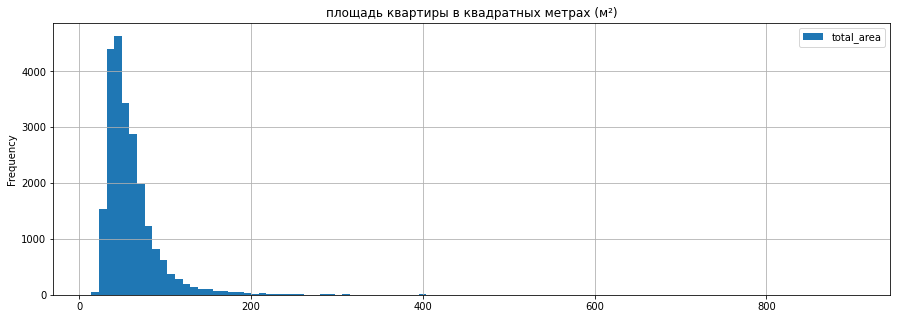

Медиана столбца жилая площадь в квадратных метрах(м²) равна: 30.40
Средние значение столбца жилая площадь в квадратных метрах(м²) равна: 34.31


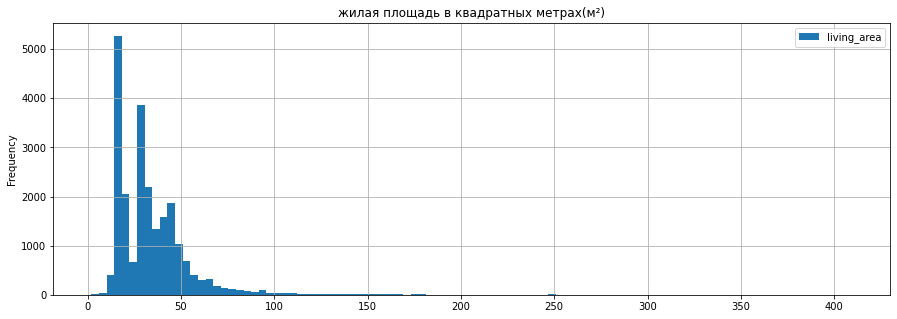

Медиана столбца цена на момент снятия с публикации равна: 4650000.00
Средние значение столбца цена на момент снятия с публикации равна: 6484663.26


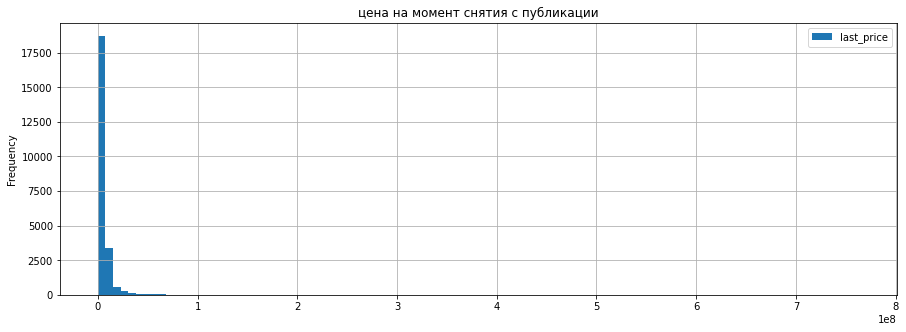

Медиана столбца число комнат равна: 2.00
Средние значение столбца число комнат равна: 2.08


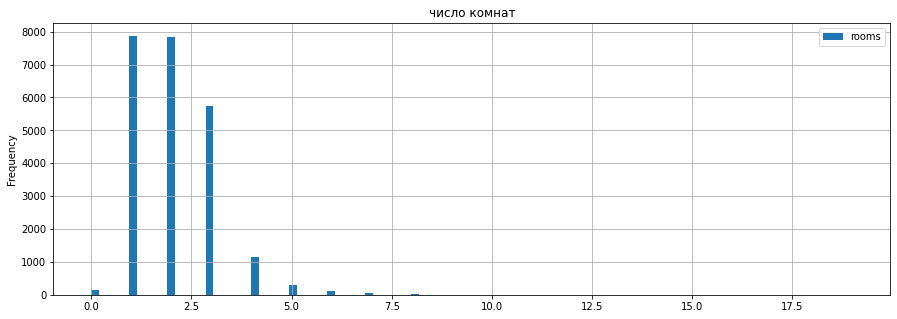

Медиана столбца высота потолков (м) равна: 2.64
Средние значение столбца высота потолков (м) равна: 2.71


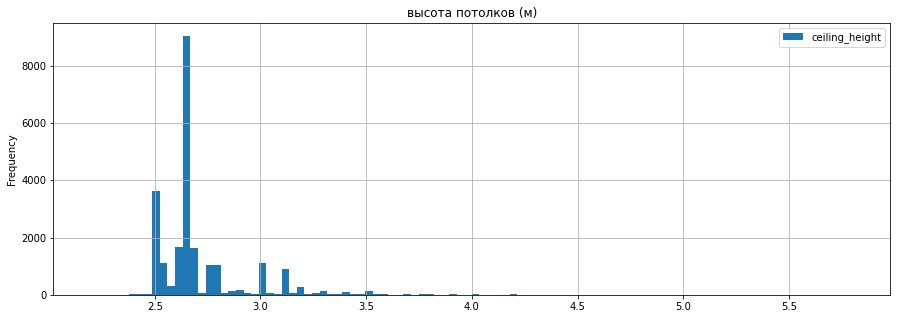

Медиана столбца соотношение жилой и общей площади равна: 0.57
Средние значение столбца соотношение жилой и общей площади равна: 0.56


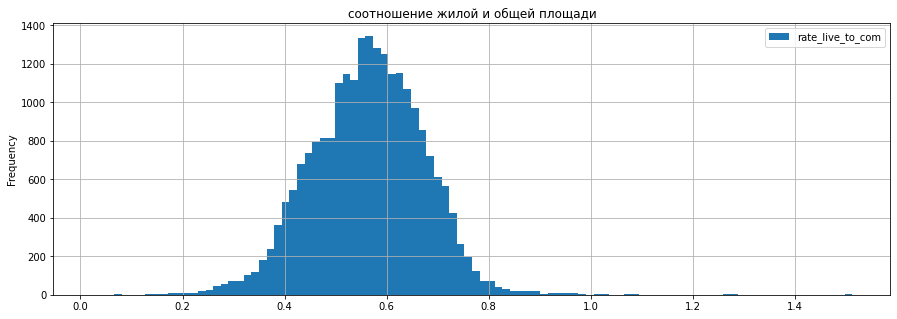

Медиана столбца отношение площади кухни к общей равна: 0.17
Средние значение столбца отношение площади кухни к общей равна: 0.19


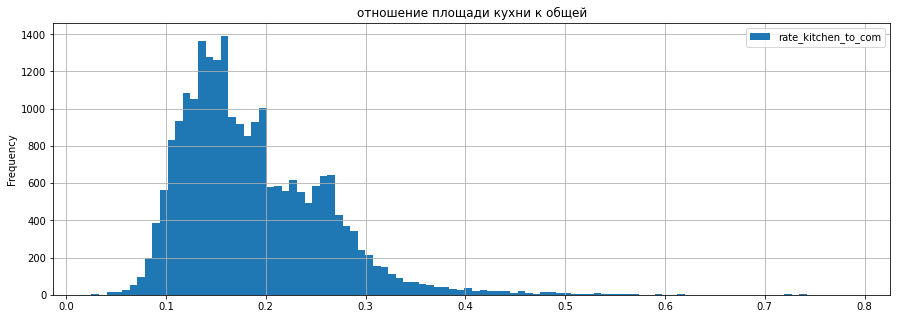

Медиана столбца расстояние до ближайшего аэропорта в метрах (м) равна: 124.00
Средние значение столбца расстояние до ближайшего аэропорта в метрах (м) равна: 265.65


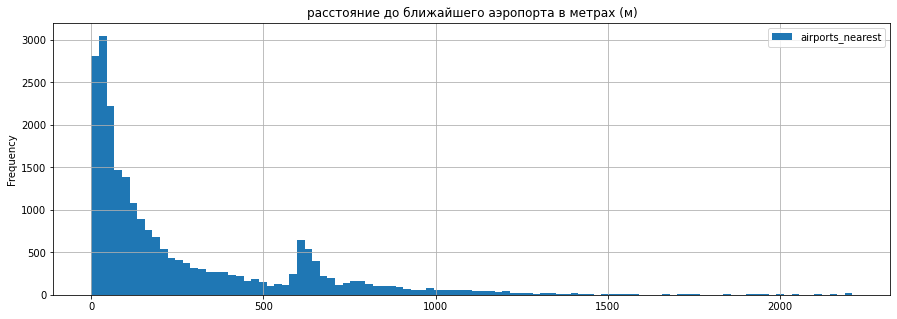

In [75]:
#Изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
#Постройте гистограммы для каждого параметра.
what_study=['total_area', 'living_area', 'last_price','rooms', 
            'ceiling_height', 'rate_live_to_com', 'rate_kitchen_to_com', 'airports_nearest']
what_study_name=['площадь квартиры в квадратных метрах (м²)',
                'жилая площадь в квадратных метрах(м²)',
                'цена на момент снятия с публикации',
                'число комнат',
                'высота потолков (м)',
                'соотношение жилой и общей площади',
                'отношение площади кухни к общей',
                'расстояние до ближайшего аэропорта в метрах (м)']

for i in range(len(what_study)):
    data.plot(y=[what_study[i]],kind='hist',
              bins=100, 
              figsize=(15,5), 
              grid=True, title=what_study_name[i])
    median=data[what_study[i]].median()
    mean=data[what_study[i]].mean()
    print("Медиана столбца {} равна: {:.2f}".format(what_study_name[i],median))
    print("Средние значение столбца {} равна: {:.2f}".format(what_study_name[i],mean))
    plt.show()

**Вывод:** все графики напоминают собой распределение распределение Пуассона с очень длинными хвостами. На этапе обучения моделей машинного обучения потребуется нормировка данных.

<a name="4.2."></a>
## Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

<font size="2">([к содержанию](#0.0))</font>

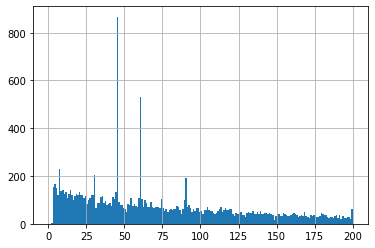

Среднее время продажи квартиры: 181 дн.
Медианное время продажи квартиры: 96 дн.


In [76]:
#Изучите время продажи квартиры. 
#Постройте гистограмму. Посчитайте среднее и медиану. 
#Опишите, сколько обычно занимает продажа. 
#Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
closed_ad=data[~data['Open']]
closed_ad['days_exposition'].hist(bins=200, range=(0,200))
plt.show()
print('Среднее время продажи квартиры: {:.0f} дн.'.format(closed_ad['days_exposition'].mean()))
print('Медианное время продажи квартиры: {:.0f} дн.'.format(closed_ad['days_exposition'].median()))

In [77]:
closed_ad['days_exposition'].value_counts().sort_values(ascending=False).head(20)

45    867
60    529
7     231
30    206
90    191
4     168
3     152
5     150
14    143
9     140
8     138
20    135
44    135
11    134
10    125
18    125
13    124
6     122
21    122
28    122
Name: days_exposition, dtype: int64

In [78]:
closed_ad['days_exposition'].quantile(q=0.85)

364.0

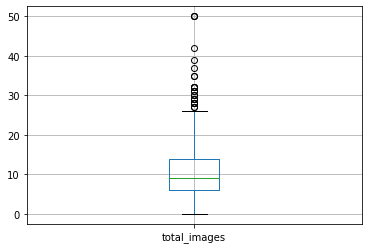

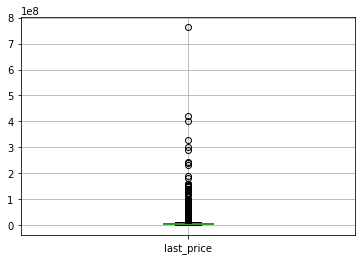

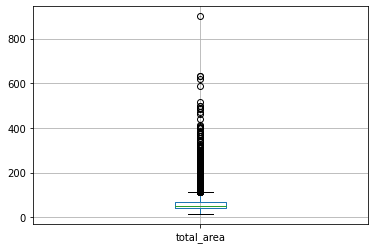

Столбец first_day_exposition не подходит для построения диграммы размаха


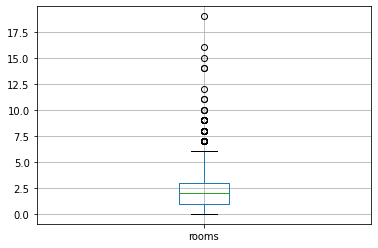

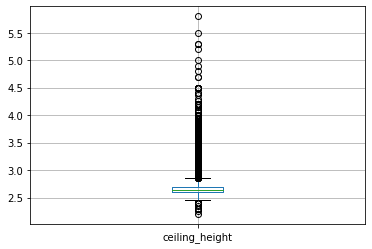

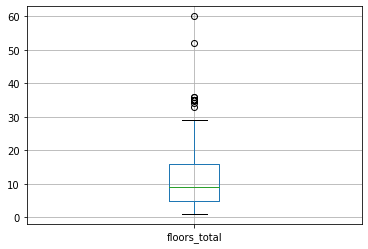

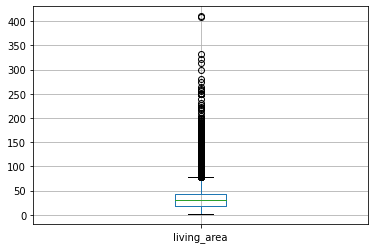

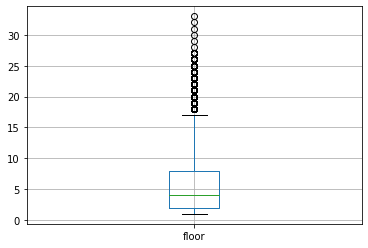

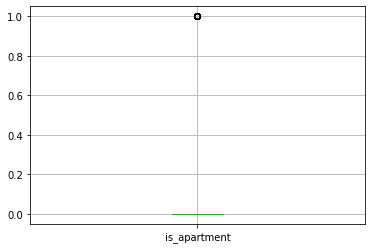

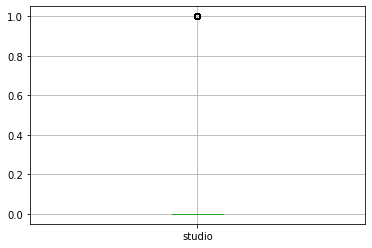

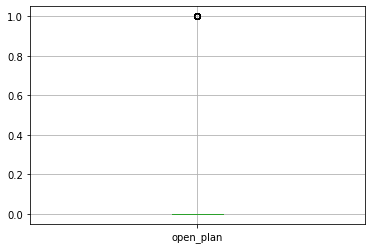

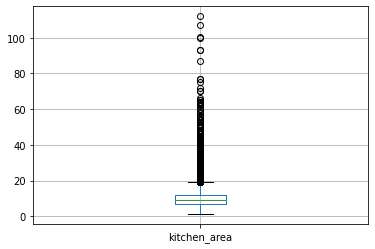

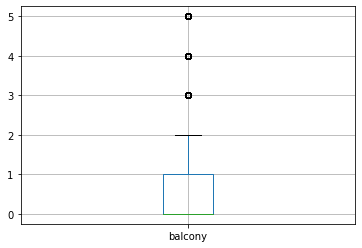

Столбец locality_name не подходит для построения диграммы размаха


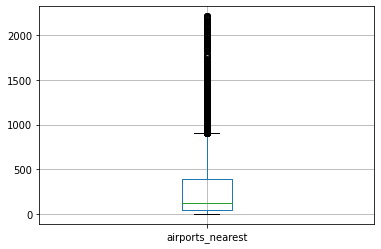

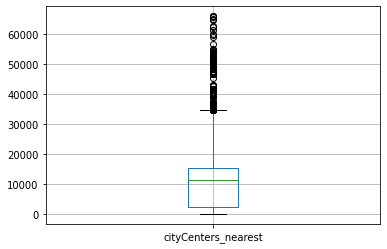

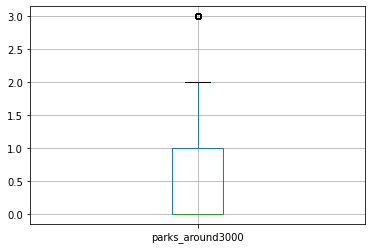

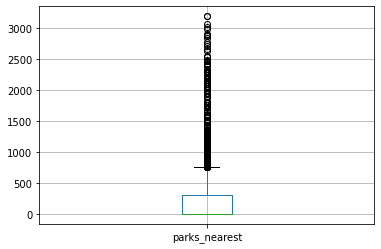

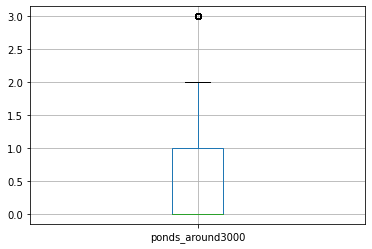

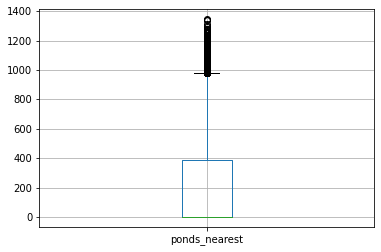

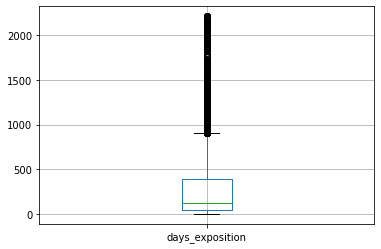

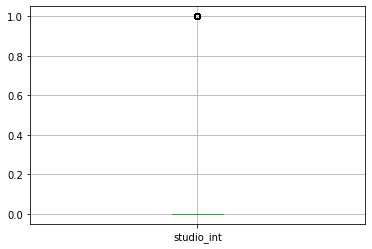

Столбец locality_name_type не подходит для построения диграммы размаха


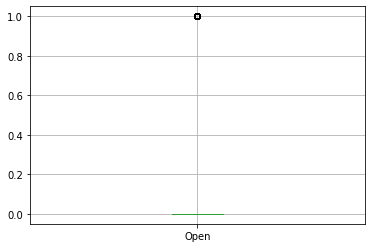

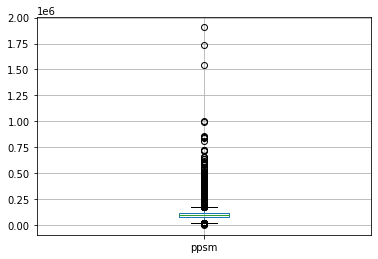

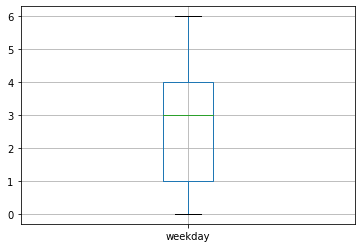

Столбец weekday_name не подходит для построения диграммы размаха


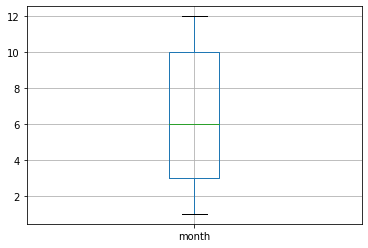

Столбец month_name не подходит для построения диграммы размаха


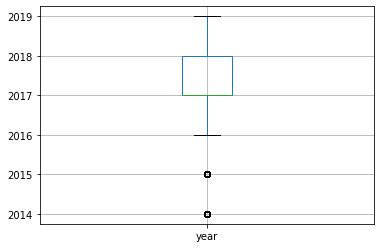

Столбец floor_type не подходит для построения диграммы размаха


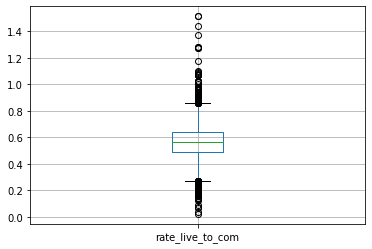

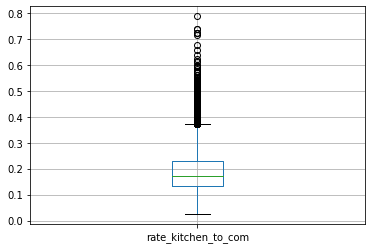

In [79]:
#Бедем рассматривать все данные, даже те, которые ещё не закрыты
for column in data.columns:
    try:
        data.boxplot(column)
        plt.show()
    except:
        print("Столбец {} не подходит для построения диграммы размаха".format(column))
#closed_ad.boxplot(['days_exposition'])

<AxesSubplot:>

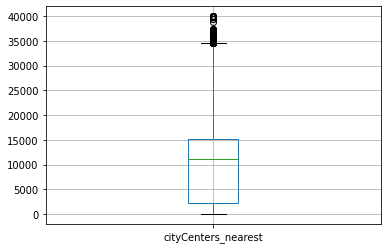

In [80]:
#Всё ещё много
#data[data['last_price']<100_000_000].boxplot('last_price')
#data[data['ceiling_height']<3].boxplot('ceiling_height')
#data[data['last_price']<10_000_000].boxplot('kitchen_area')
#data[data['kitchen_area']<20].boxplot('kitchen_area')
data[data['cityCenters_nearest']<40_000].boxplot('cityCenters_nearest')

**Вывод:** на неотфильтрованных данных среднее время продаж составляет почти 6 месяцев. Исходи из гистограммы видно, что ориентироваться при оценки ожидаемого времени продаж квартиры на среднее время будет неправильным, так как слишком большие значения (больше 300 - продавать квартиру почти год или больше - как-то подозрительно) смещают среднюю величину времени в область высоких значений. Если ориентироваться на медиану, то она составляет число, которое почти в 2 раза меньшее медианы и с логической точки зрения более ожидаемо, всё таки не портативную колонку продаём. Предположу, что слишком явными выбросами являются значения выше 500 дней и ниже 45 дней (из describe). Для определения граничных значений, выше и ниже которых находятся аномальные значения воспользуемся диаграммной размаха. Также в длительности размещения объявлений наблюдаются выбросы в 45  и 60 дни. Возможно, на сервере в эти  дни происходит сброс объявлений.

<a name="4.3."></a>
## Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

<font size="2">([к содержанию](#0.0))</font>

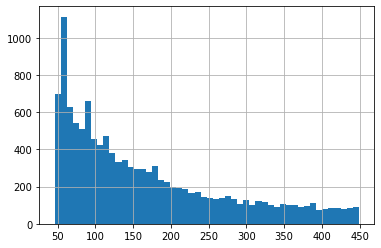

In [81]:
#Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
normalized_closed_ad=closed_ad[(closed_ad['days_exposition']<450) &(closed_ad['days_exposition']>45)]
normalized_closed_ad['days_exposition'].hist(bins=50)
plt.show()

In [82]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'studio_int', 'locality_name_type',
       'Open', 'ppsm', 'weekday', 'weekday_name', 'month', 'month_name',
       'year', 'floor_type', 'rate_live_to_com', 'rate_kitchen_to_com'],
      dtype='object')

**Вывод (все сделаны на основании диаграмм размаха):**
- total_images - в данном столбце аномалий нет, хотя количество фотографий объекта продажи меньше 7 и больше 15 выходят за пределы типичных значений, а большие 25 фотографий наблюдается только у исключительных объектов
- last_price - квартиры выше 10 млн рублей смещают данные и их, возможно, стоит рассмотреть отдельно, наиболее типичными являются цены от 3 до 6 млн
- total_area - большинство квартир, стоимостью более 10 млн, имеют огромный размер помещения >200 метров, хотя типичным метражом для квартир является от 40 до 60, квартиры от 60 до 100 метров также подходят для анализа данных, и их доля составляет 25%
- rooms - типичная ситуация для количество комнат - это 1-3 комнаты, студии также входят в аналитическую группы, но их количество составляет 25%, количество квартир больше 7 также следует выбросить из анализа продаж типичных квартир
- ceiling_height - высоту потолков оставим без изменений, так как остальные выбросы, связанные с дорогими домами с высокими потолками отбросятся на предыдущих стадиях анализа
- булевые значения нельзя анализировать на выбросы, поэтому следующие 3 столбца пропустим
- kitchen_area - оставим объекты с размером квартир от 2 до 17
- balcony - количество балконов до 2
- airports_nearest - создаётся впечатление, что все живут около аэропорта
- cityCenters_nearest - как правило люди не продают квартиры прямо в центре или за пределами города (типичные квартиры расположены в кольце от 5 до 15 км). Объекты, которые расположены дальше 40 км выбросим из анализа
- parks_nearest и parks_around3000 - в большинстве объявлений указано, что на расстояния 750 м есть 1 парк, или их вообще нет. записи, в которых больше 1 парка выбросим из расчётов
- ponds_around3000 и ponds_nearest - ситуация аналогична паркам, только ближайшее расстояние до пруда 400 метров
- параметр ppsm - цена квадратного метра - впишется сам в размах, когда мы выровняем взаимосвязанные параметры
- как правило объявления о продаже подавались в 2017 и в 2018 годах с понедельника по четверг в любое время годе, кроме декабря и января

In [83]:
print("Было:", data.shape[0])

Было: 23252


In [84]:
#Большущий фильтр
data_for_parse=data.query("last_price<100_000_000 and total_area<100 and rooms<7 and 2<kitchen_area<40 and balcony<3 and airports_nearest<40_000")
data_for_parse

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,Open,ppsm,weekday,weekday_name,month,month_name,year,floor_type,rate_live_to_com,rate_kitchen_to_com
1,7,3350000.0,40.40,2018-12-04,1,2.64,11,18.6,1,False,...,False,82920.792079,1,вторник,12,Декабрь,2018,Первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.64,5,34.3,4,False,...,False,92785.714286,3,четверг,8,Август,2015,Другой,0.612500,0.148214
5,10,2890000.0,30.40,2018-09-10,1,2.64,12,14.4,5,False,...,False,95065.789474,0,понедельник,9,Сентябрь,2018,Другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,2.64,26,10.6,6,False,...,False,99195.710456,3,четверг,11,Ноябрь,2017,Другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,2.64,24,30.5,22,False,...,True,110544.692737,3,четверг,4,Апрель,2019,Другой,0.425978,0.263966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,False,...,False,73717.948718,4,пятница,8,Август,2016,Другой,0.641026,0.128205
23695,14,3100000.0,59.00,2018-01-15,3,2.64,5,38.0,4,False,...,False,52542.372881,0,понедельник,1,Январь,2018,Другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,2.64,3,29.7,1,False,...,True,44091.710758,6,воскресенье,2,Февраль,2018,Первый,0.523810,0.141093
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,False,...,False,149511.400651,1,вторник,3,Март,2017,Другой,0.397394,0.303583


In [85]:
print("Стало:", data_for_parse.shape[0])
print("Проценты от исходных: {:.0%}".format(data_for_parse.shape[0]/data.shape[0]))

Стало: 20938
Проценты от исходных: 90%


<AxesSubplot:>

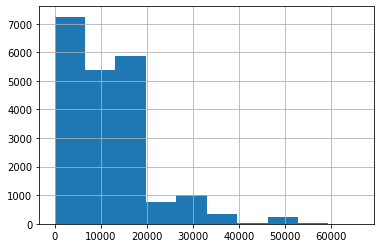

In [86]:
data_for_parse['cityCenters_nearest'].hist()

<a name="4.4."></a>
## Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

<font size="2">([к содержанию](#0.0))</font>

In [88]:
#Какие факторы больше всего влияют на стоимость квартиры?
#Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. 
#Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 
#Также изучите зависимость от даты размещения: дня недели, месяца и года.
data_for_parse.corr().sort_values(by='last_price')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_nearest,days_exposition,studio_int,Open,ppsm,weekday,month,year,rate_live_to_com,rate_kitchen_to_com
rate_kitchen_to_com,-0.026109,-0.073997,-0.412378,-0.638646,0.058662,0.365926,-0.623939,0.260170,0.012293,0.023211,...,0.000953,-0.055578,0.023211,-0.054838,0.242313,-0.003211,0.011448,0.007080,-0.668378,1.000000
studio_int,-0.023265,-0.042995,-0.097571,-0.157170,0.018949,0.063934,-0.059515,0.032848,-0.002791,1.000000,...,-0.002139,-0.002614,1.000000,0.001879,0.033241,0.004560,-0.000132,0.002488,0.074621,0.023211
studio,-0.023265,-0.042995,-0.097571,-0.157170,0.018949,0.063934,-0.059515,0.032848,-0.002791,1.000000,...,-0.002139,-0.002614,1.000000,0.001879,0.033241,0.004560,-0.000132,0.002488,0.074621,0.023211
rate_live_to_com,0.005700,-0.032416,0.217058,0.580463,-0.054572,-0.382206,0.624259,-0.274573,-0.007251,0.074621,...,-0.018356,0.027523,0.074621,0.044448,-0.226446,0.007128,-0.015875,0.008616,1.000000,-0.668378
open_plan,-0.019991,-0.030864,-0.058773,-0.086965,-0.001463,0.043865,-0.034320,0.031918,-0.001856,-0.003383,...,-0.003101,-0.022812,-0.003383,-0.017797,0.008810,0.005079,0.019516,-0.023996,0.050292,0.014110
weekday,-0.007896,-0.016947,-0.009074,0.000228,-0.009743,0.007020,-0.004017,0.007477,-0.012541,0.004560,...,-0.007584,-0.025954,0.004560,-0.018780,-0.016399,1.000000,0.008976,0.001920,0.007128,-0.003211
month,0.004103,-0.002307,0.005775,-0.000741,0.002127,0.016143,-0.002840,0.022585,-0.002306,-0.000132,...,0.003628,-0.090401,-0.000132,-0.144120,-0.006807,0.008976,1.000000,-0.270212,-0.015875,0.011448
year,0.148760,0.006044,-0.049358,-0.024379,-0.047473,-0.000007,-0.036432,0.002744,0.006651,0.002488,...,-0.010169,-0.184596,0.002488,0.384542,0.055738,0.001920,-0.270212,1.000000,0.008616,0.007080
balcony,0.031856,0.007507,-0.014759,-0.066922,-0.070238,0.181588,-0.053988,0.179116,0.026595,0.040252,...,-0.016039,-0.038142,0.040252,-0.017472,0.033048,0.000597,0.013839,-0.014426,-0.098838,0.081368
cityCenters_nearest,0.004784,0.045831,-0.029215,-0.016811,-0.141126,0.090105,-0.030069,0.059477,0.016056,-0.013761,...,0.216708,-0.046416,-0.013761,-0.038132,0.126757,0.000156,-0.009599,-0.009071,-0.017943,-0.019781


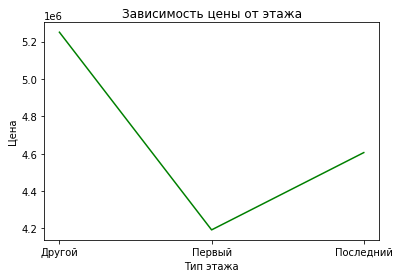

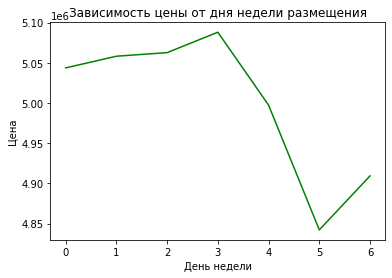

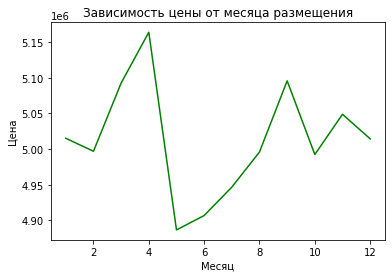

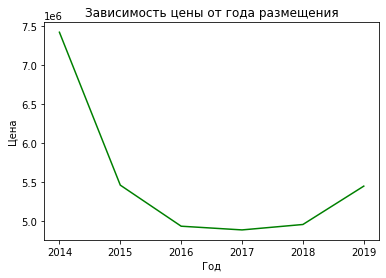

In [89]:
pivot_by_floor=data_for_parse.pivot_table(index='floor_type', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_floor.index,pivot_by_floor["mean"]["last_price"], 'g-')
plt.title('Зависимость цены от этажа')
plt.ylabel('Цена')
plt.xlabel('Тип этажа')
plt.show()

pivot_by_day=data_for_parse.pivot_table(index='weekday', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_day.index,pivot_by_day["mean"]["last_price"], 'g-')
plt.title('Зависимость цены от дня недели размещения')
plt.ylabel('Цена')
plt.xlabel('День недели')
plt.show()

pivot_by_month_name=data_for_parse.pivot_table(index='month', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_month_name.index,pivot_by_month_name["mean"]["last_price"], 'g')
plt.title('Зависимость цены от месяца размещения')
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.show()

pivot_by_year=data_for_parse.pivot_table(index='year', values='last_price', aggfunc=['mean'])
plt.plot(pivot_by_year.index,pivot_by_year["mean"]["last_price"], 'g-')
plt.title('Зависимость цены от года размещения')
plt.ylabel('Цена')
plt.xlabel('Год')
plt.show()
#pivot_by_year["mean"]["last_price"]

**Вывод:**<br>
На стоимость квартиры влияют: 
- общая площадь квартиры (0.52)
- количество комнат (0.42) 
- жилая площадь (0.46)

Отметим, что связь с площадью кухни не такая сильная, всего (0.19). Наличие корреляции между общим метражом и ценой квартиры также показывает коэффициет со стоимостью квадратного метра (0.68). Цена квартиры имеет сильную отрицательную корреляцию с коэффициентом, демонстрирующем отношение площади ккухни ко всей площади, и это понятно, что чем больше этот коэффициент, тем меньше общая площадь квартиры.<br>
Таким образом, цена сильно зависит от количества квадратных метров. Число комнат в меньшей степени влияет на цену квартиры, однако корреляция всё ещё наблюдается, а вот удалённость от центра совсем не влияет на цену квартиры (записи квартир, расположенных прямо в центре, также остались в анализируемом наборе)<br>
Отметим ещё несколько дополнительных факторов:

- цена квартиры на первом этаже как правило ниже, чем на других
- цены на квартиры под дейтсвием инфляции растут каждый год (в 2014 был валютный кризис, поэтому начальный подъём такой высокий, а затем идёт спад)
- цены на квартиры зимой выше чем летом
- люди выставляют завышенные цены на квартиры во вторник и ближе к выходным они падают

<a name="4.5."></a>
## Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.

<font size="2">([к содержанию](#0.0))</font>

In [90]:
#Выберите 10 населённых пунктов с наибольшим числом объявлений. 
#Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
#Выделите населённые пункты с самой высокой и низкой стоимостью жилья.
largest_group=data_for_parse.groupby('locality_name').count().sort_values('total_images', ascending=False)[:10].index

mean_price=[]
for name in largest_group:
    largest_group_parse=data[data['locality_name']==name]
    mean_data=largest_group_parse['ppsm'].mean()
    print("В населённом пункте '{}' средняя цена квадратного метра: {:.2f} руб".format(name, mean_data))
    mean_price.append(mean_data)

В населённом пункте 'Санкт-Петербург' средняя цена квадратного метра: 114442.95 руб
В населённом пункте 'посёлок Мурино' средняя цена квадратного метра: 85207.23 руб
В населённом пункте 'посёлок Шушары' средняя цена квадратного метра: 78551.34 руб
В населённом пункте 'Всеволожск' средняя цена квадратного метра: 68750.70 руб
В населённом пункте 'Пушкин' средняя цена квадратного метра: 102844.93 руб
В населённом пункте 'посёлок Парголово' средняя цена квадратного метра: 90332.26 руб
В населённом пункте 'Колпино' средняя цена квадратного метра: 75408.35 руб
В населённом пункте 'Гатчина' средняя цена квадратного метра: 68757.68 руб
В населённом пункте 'деревня Кудрово' средняя цена квадратного метра: 92419.63 руб
В населённом пункте 'Выборг' средняя цена квадратного метра: 58238.14 руб


In [91]:
print("Город с максимальной стоимостью жилья: {}".format(largest_group[mean_price.index(max(mean_price))]))
print("Город с минимальной стоимостью жилья: {}".format(largest_group[mean_price.index(min(mean_price))]))

Город с максимальной стоимостью жилья: Санкт-Петербург
Город с минимальной стоимостью жилья: Выборг


<a name="4.6."></a>
## Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге. необходимо выяснить, какая область входит в центр.  Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

<font size="2">([к содержанию](#0.0))</font>

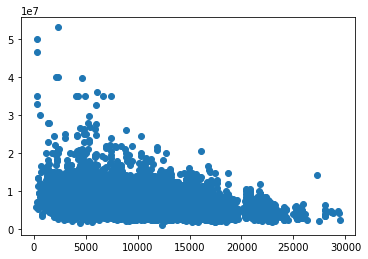

In [88]:
data_SPB=data_for_parse[data_for_parse['locality_name']=='Санкт-Петербург']
plt.scatter(x=data_SPB['cityCenters_nearest'], y=data_SPB['last_price'])

<a name="4.7."></a>
## Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

<font size="2">([к содержанию](#0.0))</font>

In [92]:
#Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
#Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
#Сделайте выводы. Отличаются ли они от общих выводов по всему городу?
cetral_objects=data_for_parse[data['cityCenters_nearest']<7500]
cetral_objects.corr().sort_values(by='last_price')

<ipython-input-92-95d89db27d87>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cetral_objects=data_for_parse[data['cityCenters_nearest']<7500]


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_nearest,days_exposition,studio_int,Open,ppsm,weekday,month,year,rate_live_to_com,rate_kitchen_to_com
rate_live_to_com,0.008378,-0.055178,0.197040,0.532495,0.013188,-0.338444,0.611149,-0.254342,0.025557,0.071512,...,-0.027517,0.035907,0.071512,0.049167,-0.190837,0.007572,-0.007258,0.006765,1.000000,-0.630658
year,0.136638,-0.054503,-0.076819,-0.043670,-0.047670,-0.013272,-0.059482,-0.003419,-0.020646,-0.003139,...,-0.066339,-0.196018,-0.003139,0.382947,-0.024747,0.003889,-0.253145,1.000000,0.006765,0.009879
balcony,0.006041,-0.050115,-0.068756,-0.106836,-0.147758,0.207780,-0.104090,0.199408,0.023905,0.036862,...,-0.096443,-0.017301,0.036862,-0.008507,-0.018464,0.014344,0.000096,-0.005288,-0.115733,0.095892
studio_int,-0.042454,-0.029921,-0.100218,-0.173279,0.013381,0.072973,-0.060520,0.059431,-0.002964,1.000000,...,0.009373,-0.005520,1.000000,0.002037,0.027219,-0.000835,-0.012045,-0.003139,0.071512,0.019575
studio,-0.042454,-0.029921,-0.100218,-0.173279,0.013381,0.072973,-0.060520,0.059431,-0.002964,1.000000,...,0.009373,-0.005520,1.000000,0.002037,0.027219,-0.000835,-0.012045,-0.003139,0.071512,0.019575
rate_kitchen_to_com,-0.016395,-0.027838,-0.411387,-0.607180,-0.000411,0.374104,-0.611018,0.261367,-0.001562,0.019575,...,-0.003137,-0.080161,0.019575,-0.074231,0.201942,0.002476,0.009667,0.009879,-0.630658,1.000000
open_plan,-0.031246,-0.024821,-0.068877,-0.099347,-0.010939,0.057725,-0.041739,0.036292,-0.002162,-0.004382,...,-0.014651,-0.032180,-0.004382,-0.023399,0.011764,0.012178,0.037581,-0.036542,0.049540,0.013295
weekday,-0.007266,-0.020852,-0.012312,0.005765,-0.007462,-0.001572,-0.008051,0.013881,-0.018198,-0.000835,...,-0.017027,-0.023028,-0.000835,-0.016738,-0.022428,1.000000,0.026313,0.003889,0.007572,0.002476
month,0.000352,0.001314,0.013631,0.002330,0.005857,0.032852,0.007032,0.035281,-0.003503,-0.012045,...,0.017628,-0.093508,-0.012045,-0.135161,-0.000628,0.026313,1.000000,-0.253145,-0.007258,0.009667
floor,0.000124,0.035583,-0.095312,-0.198758,-0.093048,0.709261,-0.185463,1.000000,-0.007397,0.059431,...,-0.061014,-0.085161,0.059431,-0.079968,0.125407,0.013881,0.035281,-0.003419,-0.254342,0.261367


In [93]:
cetral_objects

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,Open,ppsm,weekday,weekday_name,month,month_name,year,floor_type,rate_live_to_com,rate_kitchen_to_com
5,10,2890000.0,30.40,2018-09-10,1,2.64,12,14.40,5,False,...,False,95065.789474,0,понедельник,9,Сентябрь,2018,Другой,0.473684,0.299342
8,20,2900000.0,33.16,2018-05-23,1,2.64,27,15.43,26,False,...,False,87454.764777,2,среда,5,Май,2018,Другой,0.465320,0.265682
12,10,3890000.0,54.00,2016-06-30,2,2.64,5,30.00,5,False,...,False,72037.037037,3,четверг,6,Июнь,2016,Последний,0.555556,0.166667
22,20,5000000.0,58.00,2017-04-24,2,2.75,25,30.00,15,False,...,False,86206.896552,0,понедельник,4,Апрель,2017,Другой,0.517241,0.189655
24,8,6500000.0,97.20,2015-10-31,2,3.10,3,46.50,1,False,...,False,66872.427984,5,суббота,10,Октябрь,2015,Первый,0.478395,0.201646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,False,129903.978052,3,четверг,10,Октябрь,2016,Другой,0.552812,0.145405
23692,2,1350000.0,30.00,2017-07-07,1,2.64,5,17.50,4,False,...,False,45000.000000,4,пятница,7,Июль,2017,Другой,0.583333,0.200000
23695,14,3100000.0,59.00,2018-01-15,3,2.64,5,38.00,4,False,...,False,52542.372881,0,понедельник,1,Январь,2018,Другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,2.64,3,29.70,1,False,...,True,44091.710758,6,воскресенье,2,Февраль,2018,Первый,0.523810,0.141093


Медиана столбца площадь квартиры в квадратных метрах (м²) равна: 51.20
Средние значение столбца площадь квартиры в квадратных метрах (м²) равна: 54.06


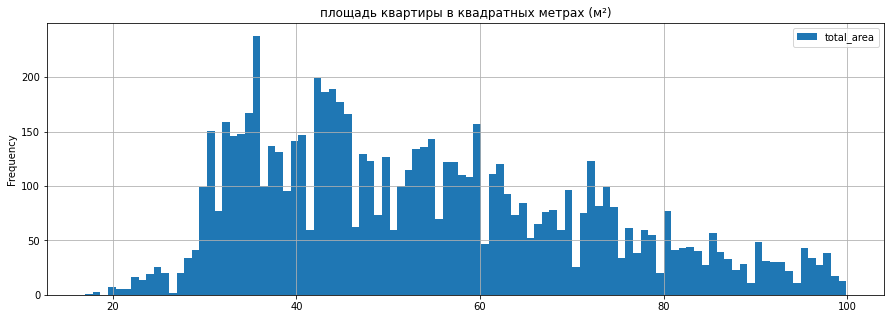

Медиана столбца жилая площадь в квадратных метрах(м²) равна: 30.00
Средние значение столбца жилая площадь в квадратных метрах(м²) равна: 31.05


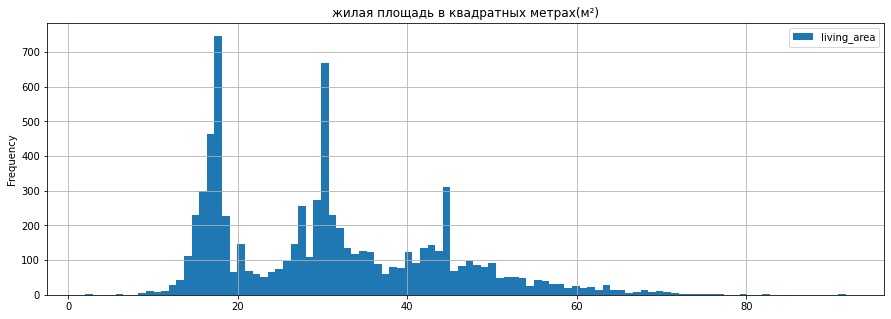

Медиана столбца цена на момент снятия с публикации равна: 3500000.00
Средние значение столбца цена на момент снятия с публикации равна: 4689336.67


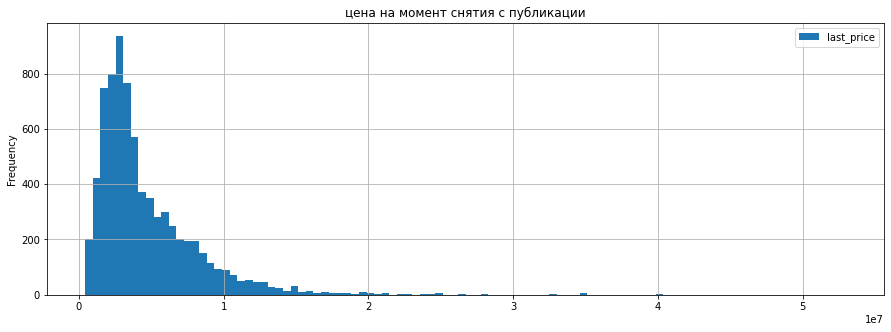

Медиана столбца число комнат равна: 2.00
Средние значение столбца число комнат равна: 1.95


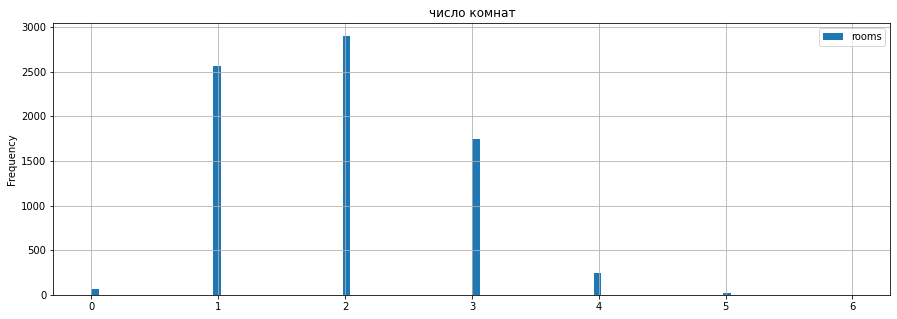

Медиана столбца высота потолков (м) равна: 2.64
Средние значение столбца высота потолков (м) равна: 2.74


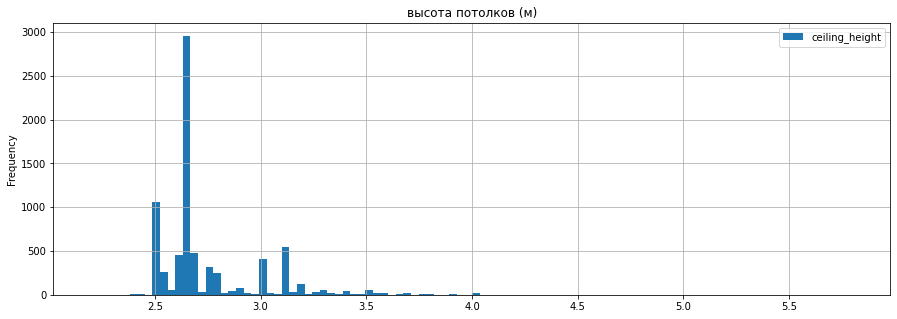

Медиана столбца соотношение жилой и общей площади равна: 0.57
Средние значение столбца соотношение жилой и общей площади равна: 0.57


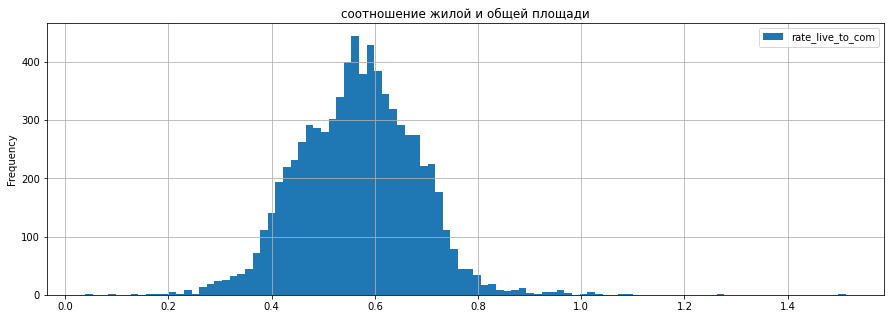

Медиана столбца отношение площади кухни к общей равна: 0.17
Средние значение столбца отношение площади кухни к общей равна: 0.19


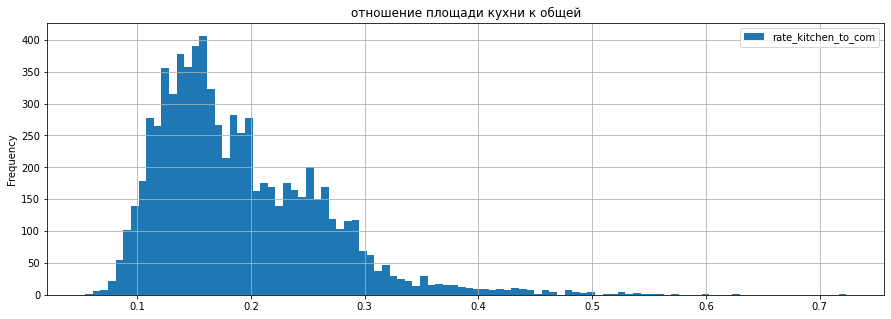

In [94]:
what_study=['total_area', 'living_area', 'last_price','rooms', 
            'ceiling_height', 'rate_live_to_com', 'rate_kitchen_to_com']
what_study_name=['площадь квартиры в квадратных метрах (м²)',
                'жилая площадь в квадратных метрах(м²)',
                'цена на момент снятия с публикации',
                'число комнат',
                'высота потолков (м)',
                'соотношение жилой и общей площади',
                'отношение площади кухни к общей',
                ]

for i in range(len(what_study)):
    cetral_objects.plot(y=[what_study[i]],kind='hist',
              bins=100, 
              figsize=(15,5), 
              grid=True, title=what_study_name[i])
    median=cetral_objects[what_study[i]].median()
    mean=cetral_objects[what_study[i]].mean()
    print("Медиана столбца {} равна: {:.2f}".format(what_study_name[i],median))
    print("Средние значение столбца {} равна: {:.2f}".format(what_study_name[i],mean))
    plt.show()

Медиана столбца площадь квартиры в квадратных метрах (м²) равна: 49.00
Средние значение столбца площадь квартиры в квадратных метрах (м²) равна: 52.57


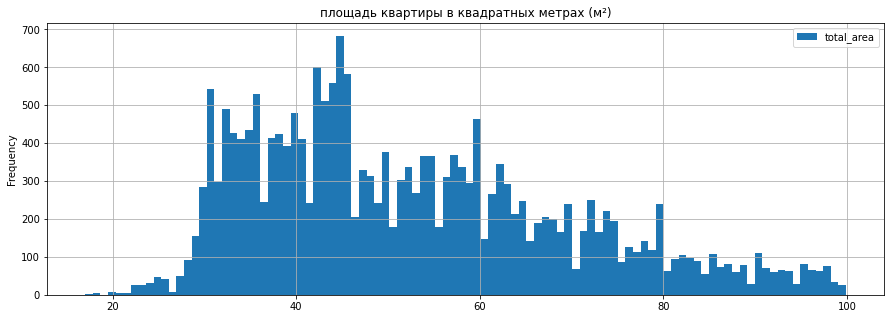

Медиана столбца жилая площадь в квадратных метрах(м²) равна: 29.40
Средние значение столбца жилая площадь в квадратных метрах(м²) равна: 29.97


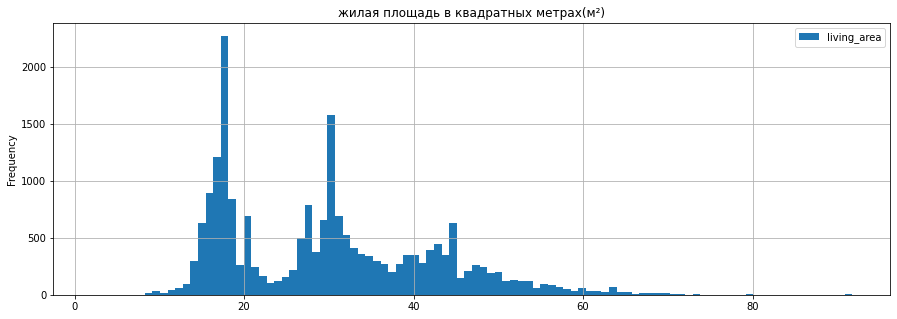

Медиана столбца цена на момент снятия с публикации равна: 4400000.00
Средние значение столбца цена на момент снятия с публикации равна: 5023098.49


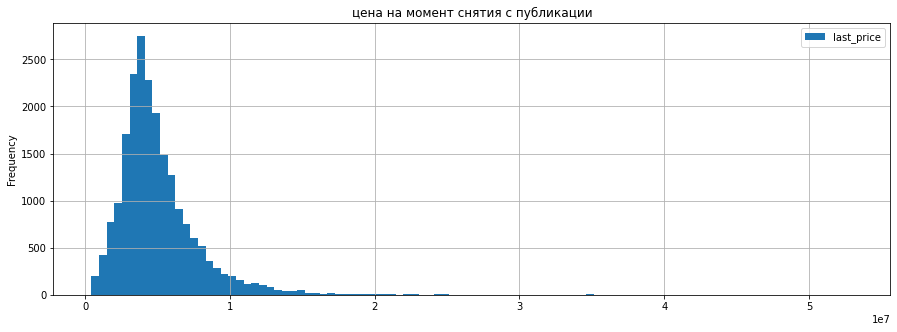

Медиана столбца число комнат равна: 2.00
Средние значение столбца число комнат равна: 1.90


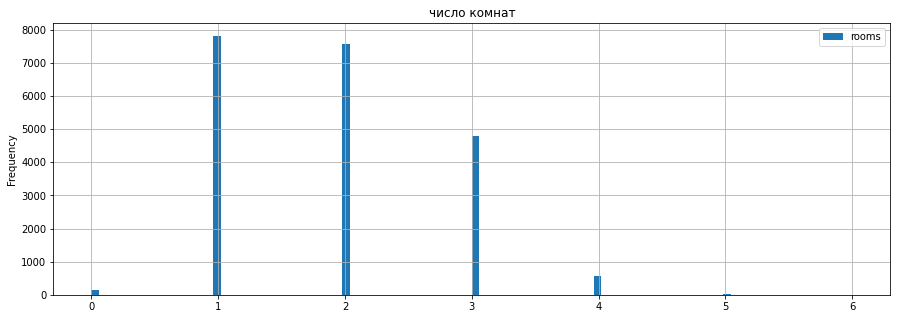

Медиана столбца высота потолков (м) равна: 2.64
Средние значение столбца высота потолков (м) равна: 2.68


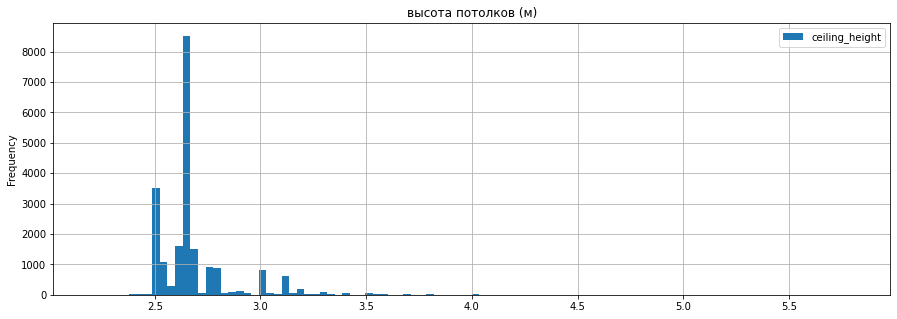

Медиана столбца соотношение жилой и общей площади равна: 0.56
Средние значение столбца соотношение жилой и общей площади равна: 0.56


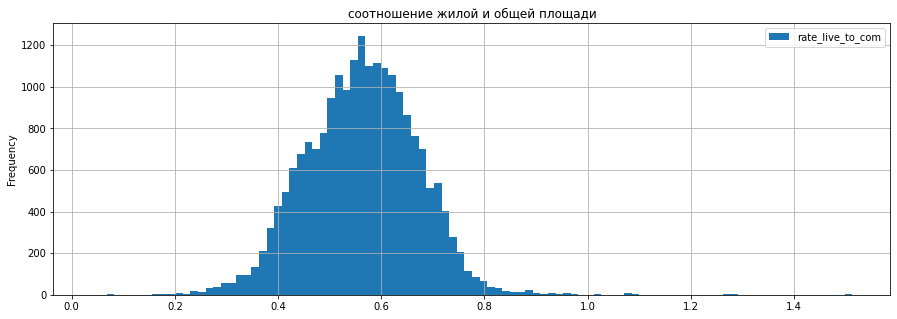

Медиана столбца отношение площади кухни к общей равна: 0.18
Средние значение столбца отношение площади кухни к общей равна: 0.19


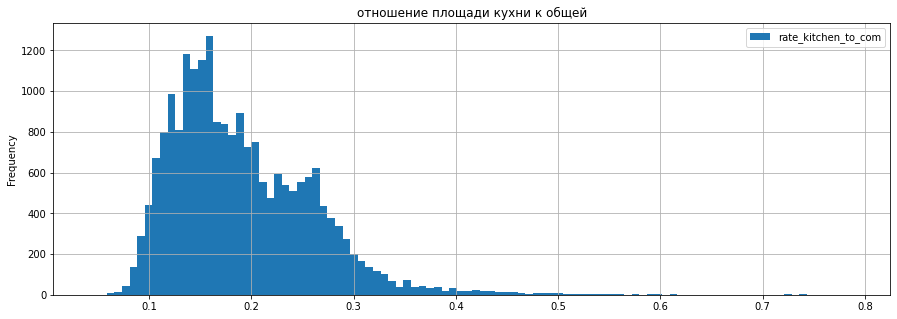

IndexError: list index out of range

In [95]:
#Изучите следующие параметры: площадь, цена, число комнат, высота потолков. 
#Постройте гистограммы для каждого параметра.
what_study=['total_area', 'living_area', 'last_price','rooms', 
            'ceiling_height', 'rate_live_to_com', 'rate_kitchen_to_com', 'airports_nearest']
what_study_name=['площадь квартиры в квадратных метрах (м²)',
                'жилая площадь в квадратных метрах(м²)',
                'цена на момент снятия с публикации',
                'число комнат',
                'высота потолков (м)',
                'соотношение жилой и общей площади',
                'отношение площади кухни к общей']

for i in range(len(what_study)):
    data_for_parse.plot(y=[what_study[i]],kind='hist',
              bins=100, 
              figsize=(15,5), 
              grid=True, title=what_study_name[i])
    median=data_for_parse[what_study[i]].median()
    mean=data_for_parse[what_study[i]].mean()
    print("Медиана столбца {} равна: {:.2f}".format(what_study_name[i],median))
    print("Средние значение столбца {} равна: {:.2f}".format(what_study_name[i],mean))
    plt.show()

**Вывод:**
Как было показано выше, в работе к центру относятся квартиры в радиусе 7,5 км.
После фильтрации и нормировки таких квартир осталось 7534. 
На стоимость квартир в центре влияют: расстояние до центра, суммарная площадь, количество парков и прудов вокруг, высота потолков и размер кухни, количество комнат в меньшей степени. У тех, кто ищет жильё в центре больше требований к квартире.<br>
Этаж, удалённость от центра и дата размещения объявления имеют слабую коррекляцию и как следствие имеют слабое воздействие на стоимость жилья
Площадь квартир вцентре и за ним почти одинаковая (по пиковым значениям тоже) 
Квартира в центре стоит на миллион больше (судя по медиане)
Остальные параметры одинаковы.
Высота потолков неожиданно одинаковая


<a name="5."></a>
# Шаг 5. Общий вывод

<font size="2">([к содержанию](#0.0))</font>

Наибольшую ценность из исходных данных представляли: суммарная площадь квартиры, количество комнат и цена. На основании именно этих критериев в дальнейшем происходит заполнение пропусков и устранение выбросов
Самыми проблематичными столбцами являются высота потолков, расстояние от центра и расстояние до аэропорта. Для заполнения пропусков по высоте потолков использовалось расстояние от центра, так как в центре расположены дома старого фонда, в которых высота потолков выше стандартных (3,1 м против 2.64)
Расстояние от центра заполнялось следующим образом. Исходя из того, что расстояние от центра равна 30 км, усреднять это растояние показалось неразумным и строки с пустотами по Санкт-Петербургу я благополучно выбросил. Для объектов, расположенных вне предлов СПб пришлось обнулить данный столбец (ведь нет ниодной записи для аналагочиного заполнения). Столбец с days_exposition заполнен мной был зря, ведь при анализе я не учитывал их при оценках распределений. Расстояние до аэропорта для городов кроме Петербурга = 0, как и количество парков с прудами.

Гистограммы для данных до и после фильтрации оцень похожи. Есть незначительные различия, которые более подробно описаны в выводах. Для создания фильтров с отсеиванием выбросов использовались лдиаграммы размаха. Те значения, что выше максимальных значений отбрасывались, так как они смещали статистику по объектам продажи в сторону высоких значений (как, например, цена квартиры).

При анализе всех данных выбли обнаружены  следющие признаки, которые влияют на цену квартиру, а именно:  
- количество квадратных метров жилья;
- количество комнат. 

Людей при покупке недвижимости, как правило, мало волнует наличие балкона, тип планировки и день подачи объявления. По поводу фактора is_apartment делать выводы по корреляции с ценой нельзя, так как в работе пустые значения заменялись на false.

Наибольшее количество объявлений о продаже недвижимости (за исключением Петербурга) в посёлках Мурино и Шушары. Разници при анализе квартир в центре и не в центре Санккт-Петербурга не обнаружено (кроме цены, и требований, чтобы квартира была именно в центре)